# Homework 2
## Problem 2: Create and Analyze a Network of Entities and Officers (40%)

The Panama Papers represent a massive leak of offshore corporate entity information (several hundred thousand entities) from the Panamanian law firm Mossack Fonseca. The papers unveil a never-before-seen network of money-laundering connections. In this assignment, you will convert a huge CSV file describing connections between entities and officials into a social network. You will also learn how to make simple conclusions about the resulting network.

The “Panama” network is a social network that describes relationships between organizations and individuals traced through electronic documentation. The network is available in five CSV files `panama_papers.edges.csv`, `panama_papers.nodes.address.csv`, `panama_papers.nodes.entity.csv`, `panama_papers.nodes.intermediary.csv`, and `panama_papers.nodes.officer.csv`.

<img src="panama.png" width="500">

### Notes: 
* **Book**: Checkout [CNA] Chapter 9.  
* **Libraries**: You may use available NetworkX functions. 
* **Comments**: Comment your code to receive maximum credit.
* **Number of Cells**: Do not change the number of (code or markdown) cells in this notebook. 



### 2.1 Create the Network (10%)
(i) First partially build this vast network. Select only the edges that refer to the “beneficiary-of” relationship (there are 19,194 edges labeled `Beneficiary of` and `beneficiary of`). 

Remember that when you add an edge to a network, NetworkX also adds both incident nodes. However, at the moment, the nodes have only more or less randomly chosen labels—and no attributes. Let’s import the attributes and true names from the other three files.

Then, you need to go through the node files for entities, officers, and intermediaries and search for the node information. For each node, you will store its name, type, and a three-letter country code. The first code block should import all the necessary modules and define the constants.

The purpose of the node dictionary is to facilitate future lookup. (Python lists have linear lookup time.) Read each of the files with a CSV dictionary reader and extract and collect the desired attributes. Note that there is no need to process rows that do not match any existing node (because your network does not include all nodes and edges) and add any nodes to the graph (because they have been already added by way of the incident edges). When done, update the node attributes "country" and "kind", and relabel the nodes to match persons and organizations names.


**Your Program Below:** 

In [3]:
#import requried pacakges
import pandas as pd
import networkx as nx

#Read edges from csv
edges = pd.read_csv("panama_papers.edges.csv")
edges = edges.filter(items=['START_ID', 'link', 'END_ID'])
edges = edges[edges["link"]=="beneficiary of"]

#Read entities from csv
enti = pd.read_csv("panama_papers.nodes.entity.csv")
enti = enti.filter(items = ["node_id", "name", "country_codes"])
enti["kind"] = "entity"

#Read officers from csv
off = pd.read_csv("panama_papers.nodes.officer.csv", sep=",")
off = off.filter(items=["node_id", "name", "country_codes"])
off["kind"] = "officier"


#Read intermediaries from csv
inte = pd.read_csv("panama_papers.nodes.intermediary.csv", sep=",")
inte = inte.filter(items=["node_id", "name", "country_codes"])
inte["kind"] = "intermediaries"

#create a dataframe with all information
info = [enti, off, inte]
info = pd.concat(info)
info = info.set_index("node_id")
name = info.filter(items = ["node_id", "name"])
info = info.to_dict(orient='index')
name = dict(zip(name.index, name.name))

#build graph from edgelist 
#testing, to be deleted 
#Add name as attribute to prevent mixing from relabel
G = nx.from_pandas_edgelist(edges, source='START_ID', target='END_ID', edge_attr="link")
nx.set_node_attributes(G, info)

C:\Users\eveli\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\eveli\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\eveli\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### 2.2 Plot the Network (5%)
Plot the graph so that nodes are painted by their kind: Entities are lightly colored, and Officers are dark. Use netwrokX or matplotlib.

**Your Program Below:** 

In [277]:
#select node with attribute officier and entity seperately 
master_nodes = [n for (n,ty) in nx.get_node_attributes(G,'kind').items() if kind == 'officier']
doc_nodes = [n for (n,ty) in nx.get_node_attributes(G,'kind').items() if kind == 'entity']
pos = nx.spring_layout(G)

#draw offcier with black and entities with red
nx.draw_networkx_nodes(G, pos, nodelist=master_nodes, node_color='black', node_shape='o')
nx.draw_networkx_nodes(G, pos, nodelist=doc_nodes, node_color='red', node_shape='o')

#draw edges
nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)

KeyboardInterrupt: 

### 2.3 Analyze the Network: Degree Distribution (10%)
(i) Compute the degree distribution and plot it using log-log scale.

**Your Program Below:** 

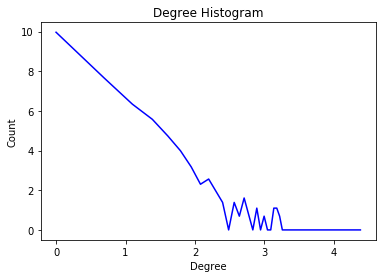

In [10]:
from matplotlib import pyplot as plt
import collections
import math
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
fig, ax = plt.subplots()
deg_l = []
cnt_l = []
for i in range(len(deg)):
    deg_l.append(math.log(deg[i]))
    cnt_l.append(math.log(cnt[i]))
    
plt.plot(deg_l, cnt_l, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

(ii) Describe the degree distribution and what it means in the context of the panama paper scandal. 

**Answer:**

It seems that the degree destribution is a straght line with some noise. The count decreases with degree which suggests, in the panama paper scandal context, there are a small amount of people/organization invloved in most transactions. And most of people/organizations have only a small number of connection, but to those involved in most transaction. 

(iii) Find the top ten nodes with highest degree. Print out their attributes in a nicely formatted way.

**Your Program Below:** 

In [11]:
sorted_degree = sorted(G.degree, key=lambda x: x[1], reverse=True)
sorted_degree = sorted_degree[0:10]
col_names =  ['Node', 'Degree', 'name','kind','country_code']
newDF = pd.DataFrame(columns = col_names)
for i in range(len(sorted_degree)):
    node = sorted_degree[i][0]
    degree = sorted_degree[i][1]
    name = G.node[node]['name']
    kind = G.node[node]['kind'] 
    country_code = G.node[node]['country_codes']
    newDF.loc[len(newDF)] = [node, degree, name, kind, country_code]
newDF

,Node,Degree,name,kind,country_code
0,13007669,80,HELITING S.A.,officier,CHE
1,13000657,29,GUANGZHOU CONSTRUCTION & DEVELOPMENT HOLDINGS ...,officier,VGB
2,13001034,26,MR. OLEKSII MYKOLAYOVYCH AZAROV,officier,AUT
3,13009140,25,SURFWAVE FOUNDATION (Daniel Steinmetz Daniela ...,officier,LIE
4,13000681,25,Zamaria Foundation (Daniel Steinmetz Daniela S...,officier,LIE
5,13003621,24,Rosa María Campollo de García,officier,GTM
6,13003761,24,Mark Omelnitski,officier,GBR
7,13004294,24,María Eugenia Campollo de Bonifasi,officier,GTM
8,13000088,23,Ramón Campollo Codina,officier,GTM
9,13007469,23,LAM KWONG-WAI,officier,HKG


### 2.4 Analyze the Network: Attributes and Assortativity (15%)
(i) What are the node attributes in the data and how many classes (categories) do they each have? 

**Your Program Below:** 

In [6]:
#find all connected component from original graph 
subgraph = list(nx.connected_component_subgraphs(G))
len(subgraph)
L = []

#store subgraphs with more than 20 edges or nodes.
for i in range(len(subgraph)):
    if subgraph[i].size() > 20 or len(subgraph[i])> 20:
        L.append(subgraph[i])
    else:
        pass   
#generate a new subgraph of G with all connected components above. 
U = nx.union_all(L)
kind=nx.get_node_attributes(U,'kind')
con_code = nx.get_node_attributes(U, 'country_codes')
print(len(set(list(kind.values()))))
print(len(set(list(con_code.values()))))

2
25


**Answer:** 

Node Attributes include: kind, country_codes. 
kind has 2 categories
country_codes has 25 categories

(ii) Perform the assortaivity test as discussed in the lecture based on the attribute "kind". As this attribute has more than two classes, perform the analysis for pairwise attribute classes.    

**Your Program Below:** 

In [7]:
nx.attribute_mixing_dict(U, 'kind')

{'entity': {'officier': 809}, 'officier': {'entity': 809}}

Based on your findings above, is the network assortaive with respect to the attribute "kind"? 

**Answer:** 

The netowrk is not assortative since all edges connect two vertices with different type. 

(iii) How deos NetworkX compute the attribute assortativity coefficient? Describe all variables in your formula. (You can type formulas in latex using the \$ environment.) 

**Answer:** 

The assortativity coefficient is computed as $r = \frac{Tr(e) - ||e^2||}{1 - ||e^2||}$, where e is a matrix such that $e_{ij}$ is the fraction of edges in a network that connect a vertex of type i to one of type j. 

 Compute the assortativity coefficient of the attribute "kind" and the degree assortativity coefficient.

**Your Program Below:** 

In [21]:
print(nx.degree_assortativity_coefficient(U))
print(nx.attribute_assortativity_coefficient(U,'kind'))

-0.34093474801878826
-1.0


Compare the assortativity coefficient of the attribute "kind" with the degree assortativity coefficient. What are your conclusions about the money-laundering connections of entities and officers? 

**Answer:**

Compared to assortativity coefficient, the degree assortativity coefficient is higher but still negative, suggesting that the nodes with a higher degree are surrounded, on average, by nodes with a smaller degree, and the other way around. It seems that  officers and entitys connect to only each other and they also tend to connect with organization with different degrees. According to the analysis above, it could be that there are lots of nodes with less degrees are connected to a node with high degress. 